In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score

Total samples:  29431
Total genes:  332


<AxesSubplot:title={'center':'Count of Samples by Cancer Type-All Data'}, xlabel='cancer_type', ylabel='sample count'>

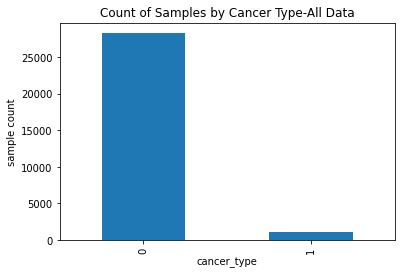

In [2]:
# data source
#url='https://raw.githubusercontent.com/mattreidy/Cholangiocarcinoma_ML/main/Data_Files/cc_cancer_mutations_post_LASSO.csv'
url='https://raw.githubusercontent.com/mattreidy/Cholangiocarcinoma_ML//main/Data_Files/cancer_mutations_post_LASSO.csv'
df = pd.read_csv(url)
# Randomly shuffle the rows to make sure the data is not sorted
df = df.sample(frac=1)
print("Total samples: ", df.shape[0])
print("Total genes: ", df.shape[1])
#print(df.head(5))
plt.title("Count of Samples by Cancer Type-All Data")
plt.xlabel("cancer_type")
plt.ylabel("sample count")
df['cancer_type'].value_counts().plot(kind='bar')

In [3]:
# split the data into 80% training and 15% test & 15% alidation sets
train_dataset, temp_test_dataset =  train_test_split(df, test_size=0.20, random_state=1)
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.50, random_state=1)
print("Training samples: ", train_dataset.shape[0])
print("Testing samples: ", test_dataset.shape[0])
print("Validation samples: ", valid_dataset.shape[0])

Training samples:  23544
Testing samples:  2943
Validation samples:  2944


In [4]:
train_labels1 = train_dataset.pop('cancer_type')
test_labels1 = test_dataset.pop('cancer_type')
valid_labels1 = valid_dataset.pop('cancer_type')
# encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

In [5]:
model = AutoSklearnClassifier(
    time_left_for_this_task=60*30,        # total seconds to run
    per_run_time_limit=600,               # max runtime seconds per process
    seed=5,                              # make repeatable
#    ensemble_size=1,
    memory_limit=None,
    initial_configurations_via_metalearning=0,
    n_jobs=-1,                           # use all cores
)

In [ ]:
%%time
model.fit(train_dataset, train_labels)

In [ ]:
print(model.sprint_statistics())

In [ ]:
model.leaderboard()

In [ ]:
test_pred = model.predict(test_dataset)
acc = accuracy_score(test_labels, test_pred)
print(f"Accuracy: {acc}")

In [ ]:
valid_pred = model.predict(valid_dataset)
acc = accuracy_score(valid_labels, valid_pred)
print(f"Accuracy: {acc}")

In [ ]:
losses_and_configurations = [
    (run_value.cost, run_key.config_id)
    for run_key, run_value in model.automl_.runhistory_.data.items()
]
losses_and_configurations.sort()
print("Lowest loss:", losses_and_configurations[0][0])
print(
    "Best configuration:",
    model.automl_.runhistory_.ids_config[losses_and_configurations[0][1]]
)

In [ ]:
# Save the best model as a file
results = model # the classifier/regressor itself
pickle.dump(results, open('cc_vs_others_classifier.pkl','wb'))